In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import joblib
from google.colab import drive

# Montar o Google Drive
drive.mount('/content/drive')

# Carregar o conjunto de dados
file_path = '/content/drive/MyDrive/Dataset Ransonware/ed0e3c43-8495-45d6-9fe1-c91f36b9c82b_balanced.csv'
df = pd.read_csv(file_path, low_memory=False)

# Remover linhas com valores NaN
df.dropna(subset=[df.columns[0]], inplace=True)

# Separar características e rótulos
X = df.iloc[:, 2:]  # Características (todas as colunas, exceto as duas primeiras)
y = df.iloc[:, 1]   # Rótulo (segunda coluna)

# Verificar tipos de dados e garantir que são numéricos
X = X.select_dtypes(include=[float, int])
print(f"Número de amostras em X: {X.shape[0]}")
print(f"Número de amostras em y: {y.shape[0]}")

# Codificar a coluna de rótulo para números
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Salvar o LabelEncoder para uso posterior no Google Drive
label_encoder_path = '/content/drive/MyDrive/Modelos/label_encoder_svm_balanceado.pkl'
joblib.dump(label_encoder, label_encoder_path)
print(f"Label encoder salvo em: {label_encoder_path}")

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Criar e treinar o modelo SVM usando um pipeline
model_pipeline = Pipeline(steps=[
    ('classifier', SVC(probability=True, random_state=42))  # probability=True é necessário para AUC-ROC
])

model_pipeline.fit(X_train, y_train)

# Avaliar a precisão do modelo
y_pred = model_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Salvar o modelo treinado no Google Drive
model_path = '/content/drive/MyDrive/Modelos/svm_model_balanceado.pkl'
joblib.dump(model_pipeline, model_path)
print(f"Modelo salvo em: {model_path}")

# Salvar o conjunto de teste em CSV com índice sequencial e rótulo verdadeiro
X_test_with_labels = X_test.copy()
X_test_with_labels['index'] = range(len(X_test_with_labels))  # Criar índice sequencial começando de 0
X_test_with_labels['true_label'] = label_encoder.inverse_transform(y_test)  # Adicionar os rótulos verdadeiros

# Salvar em CSV no Google Drive
csv_test_path = '/content/drive/MyDrive/Modelos/conjunto_teste_svm_balanceado.csv'
X_test_with_labels.to_csv(csv_test_path, index=False)
print(f"Conjunto de teste salvo como: {csv_test_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Número de amostras em X: 175566
Número de amostras em y: 175566
Label encoder salvo em: /content/drive/MyDrive/Modelos/label_encoder_svm_balanceado.pkl


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import joblib
from google.colab import drive

# Montar o Google Drive
drive.mount('/content/drive')

# Carregar o conjunto de dados
file_path = '/content/drive/MyDrive/Dataset Ransonware/ed0e3c43-8495-45d6-9fe1-c91f36b9c82b_balanced.csv'
df = pd.read_csv(file_path, low_memory=False)

# Remover linhas com valores NaN
df.dropna(subset=[df.columns[0]], inplace=True)

# Separar características e rótulos
X = df.iloc[:, 2:]  # Características (todas as colunas, exceto as duas primeiras)
y = df.iloc[:, 1]   # Rótulo (segunda coluna)

# Verificar tipos de dados e garantir que são numéricos
X = X.select_dtypes(include=[float, int])
print(f"Número de amostras em X: {X.shape[0]}")
print(f"Número de amostras em y: {y.shape[0]}")

# Codificar a coluna de rótulo para números
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Salvar o LabelEncoder para uso posterior no Google Drive
label_encoder_path = '/content/drive/MyDrive/Modelos/label_encoder_svm_balanceado.pkl'
joblib.dump(label_encoder, label_encoder_path)
print(f"Label encoder salvo em: {label_encoder_path}")

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Criar e treinar o modelo Linear SVM usando um pipeline
model_pipeline = Pipeline(steps=[
    ('classifier', LinearSVC(random_state=42, max_iter=10000))
])

model_pipeline.fit(X_train, y_train)

# Avaliar a precisão do modelo
y_pred = model_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Salvar o modelo treinado no Google Drive
model_path = '/content/drive/MyDrive/Modelos/linear_svm_model_balanceado.pkl'
joblib.dump(model_pipeline, model_path)
print(f"Modelo salvo em: {model_path}")

# Salvar o conjunto de teste em CSV com índice sequencial e rótulo verdadeiro
X_test_with_labels = X_test.copy()
X_test_with_labels['index'] = range(len(X_test_with_labels))  # Criar índice sequencial começando de 0
X_test_with_labels['true_label'] = label_encoder.inverse_transform(y_test)  # Adicionar os rótulos verdadeiros

# Salvar em CSV no Google Drive
csv_test_path = '/content/drive/MyDrive/Modelos/conjunto_teste_linear_svm_balanceado.csv'
X_test_with_labels.to_csv(csv_test_path, index=False)
print(f"Conjunto de teste salvo como: {csv_test_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Número de amostras em X: 175566
Número de amostras em y: 175566
Label encoder salvo em: /content/drive/MyDrive/Modelos/label_encoder_svm_balanceado.pkl
Accuracy: 51.18%
Modelo salvo em: /content/drive/MyDrive/Modelos/linear_svm_model_balanceado.pkl
Conjunto de teste salvo como: /content/drive/MyDrive/Modelos/conjunto_teste_linear_svm_balanceado.csv


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import joblib
from google.colab import drive

# Montar o Google Drive
drive.mount('/content/drive')

# Carregar o conjunto de dados
file_path = '/content/drive/MyDrive/Dataset Ransonware/ed0e3c43-8495-45d6-9fe1-c91f36b9c82b_desbalanceado.csv'
df = pd.read_csv(file_path, low_memory=False)

# Remover linhas com valores NaN
df.dropna(subset=[df.columns[0]], inplace=True)

# Separar características e rótulos
X = df.iloc[:, 2:]  # Características (todas as colunas, exceto a primeira)
y = df.iloc[:, 1]   # Rótulo (primeira coluna)

# Verificar tipos de dados e garantir que são numéricos
X = X.select_dtypes(include=[float, int])
print(f"Número de amostras em X: {X.shape[0]}")
print(f"Número de amostras em y: {y.shape[0]}")

# Codificar a coluna de rótulo para números
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Salvar o LabelEncoder para uso posterior no Google Drive
label_encoder_path = '/content/drive/MyDrive/Modelos/label_encoder_desbalanceado.pkl'
joblib.dump(label_encoder, label_encoder_path)
print(f"Label encoder salvo em: {label_encoder_path}")

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Criar e treinar o modelo de Regressão Logística usando um pipeline
model_pipeline = Pipeline(steps=[
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

model_pipeline.fit(X_train, y_train)

# Avaliar a precisão do modelo
y_pred = model_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Salvar o modelo treinado no Google Drive
model_path = '/content/drive/MyDrive/Modelos/logistic_regression_model_desbalanceado.pkl'
joblib.dump(model_pipeline, model_path)
print(f"Modelo salvo em: {model_path}")

# Salvar o conjunto de teste em CSV com índice sequencial e rótulo verdadeiro
X_test_with_labels = X_test.copy()
X_test_with_labels['index'] = range(len(X_test_with_labels))  # Criar índice sequencial começando de 0
X_test_with_labels['true_label'] = label_encoder.inverse_transform(y_test)  # Adicionar os rótulos verdadeiros

# Salvar em CSV no Google Drive
csv_test_path = '/content/drive/MyDrive/Modelos/conjunto_teste.csv'
X_test_with_labels.to_csv(csv_test_path, index=False)
print(f"Conjunto de teste salvo como: {csv_test_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Número de amostras em X: 1420618
Número de amostras em y: 1420618
Label encoder salvo em: /content/drive/MyDrive/Modelos/label_encoder_desbalanceado.pkl


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 90.99%
Modelo salvo em: /content/drive/MyDrive/Modelos/logistic_regression_model_desbalanceado.pkl
Conjunto de teste salvo como: /content/drive/MyDrive/Modelos/conjunto_teste.csv


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import joblib
from google.colab import drive

# Montar o Google Drive
drive.mount('/content/drive')

# Carregar o conjunto de dados
file_path = '/content/drive/MyDrive/Dataset Ransonware/ed0e3c43-8495-45d6-9fe1-c91f36b9c82b_balanced.csv'
df = pd.read_csv(file_path, low_memory=False)

# Remover linhas com valores NaN
df.dropna(subset=[df.columns[0]], inplace=True)

# Separar características e rótulos
X = df.iloc[:, 2:]  # Características (todas as colunas, exceto a primeira)
y = df.iloc[:, 1]   # Rótulo (primeira coluna)

# Verificar tipos de dados e garantir que são numéricos
X = X.select_dtypes(include=[float, int])
print(f"Número de amostras em X: {X.shape[0]}")
print(f"Número de amostras em y: {y.shape[0]}")

# Codificar a coluna de rótulo para números
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Salvar o LabelEncoder para uso posterior no Google Drive
label_encoder_path = '/content/drive/MyDrive/Modelos/label_encoder_balanceado.pkl'
joblib.dump(label_encoder, label_encoder_path)
print(f"Label encoder salvo em: {label_encoder_path}")

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Criar e treinar o modelo de Regressão Logística usando um pipeline
model_pipeline = Pipeline(steps=[
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

model_pipeline.fit(X_train, y_train)

# Avaliar a precisão do modelo
y_pred = model_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Salvar o modelo treinado no Google Drive
model_path = '/content/drive/MyDrive/Modelos/logistic_regression_model_balanceado.pkl'
joblib.dump(model_pipeline, model_path)
print(f"Modelo salvo em: {model_path}")

# Salvar o conjunto de teste em CSV com índice sequencial e rótulo verdadeiro
X_test_with_labels = X_test.copy()
X_test_with_labels['index'] = range(len(X_test_with_labels))  # Criar índice sequencial começando de 0
X_test_with_labels['true_label'] = label_encoder.inverse_transform(y_test)  # Adicionar os rótulos verdadeiros

# Salvar em CSV no Google Drive
csv_test_path = '/content/drive/MyDrive/Modelos/conjunto_teste_balanceado.csv'
X_test_with_labels.to_csv(csv_test_path, index=False)
print(f"Conjunto de teste salvo como: {csv_test_path}")


Mounted at /content/drive
Número de amostras em X: 175566
Número de amostras em y: 175566
Label encoder salvo em: /content/drive/MyDrive/Modelos/label_encoder_balanceado.pkl


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 51.77%
Modelo salvo em: /content/drive/MyDrive/Modelos/logistic_regression_model_balanceado.pkl
Conjunto de teste salvo como: /content/drive/MyDrive/Modelos/conjunto_teste_balanceado.csv


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import joblib
from google.colab import drive

# Montar o Google Drive
drive.mount('/content/drive')

# Carregar o conjunto de dados
file_path = '/content/drive/MyDrive/Dataset Ransonware/ed0e3c43-8495-45d6-9fe1-c91f36b9c82b_desbalanceado.csv'
df = pd.read_csv(file_path, low_memory=False)

# Remover linhas com valores NaN
df.dropna(subset=[df.columns[0]], inplace=True)

# Separar características e rótulos
X = df.iloc[:, 2:]  # Características (todas as colunas, exceto a primeira)
y = df.iloc[:, 1]   # Rótulo (primeira coluna)

# Verificar tipos de dados e garantir que são numéricos
X = X.select_dtypes(include=[float, int])
print(f"Número de amostras em X: {X.shape[0]}")
print(f"Número de amostras em y: {y.shape[0]}")

# Codificar a coluna de rótulo para números
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Salvar o LabelEncoder para uso posterior no Google Drive
label_encoder_path = '/content/drive/MyDrive/Modelos/label_encoder_desbalanceado.pkl'
joblib.dump(label_encoder, label_encoder_path)
print(f"Label encoder salvo em: {label_encoder_path}")

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Criar e treinar o modelo Naive Bayes usando um pipeline
model_pipeline = Pipeline(steps=[
    ('classifier', GaussianNB())
])

model_pipeline.fit(X_train, y_train)

# Avaliar a precisão do modelo
y_pred = model_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Salvar o modelo treinado no Google Drive
model_path = '/content/drive/MyDrive/Modelos/naive_bayes_model_desbalanceado.pkl'
joblib.dump(model_pipeline, model_path)
print(f"Modelo salvo em: {model_path}")

# Salvar o conjunto de teste em CSV com índice sequencial e rótulo verdadeiro
X_test_with_labels = X_test.copy()
X_test_with_labels['index'] = range(len(X_test_with_labels))  # Criar índice sequencial começando de 0
X_test_with_labels['true_label'] = label_encoder.inverse_transform(y_test)  # Adicionar os rótulos verdadeiros

# Salvar em CSV no Google Drive
csv_test_path = '/content/drive/MyDrive/Modelos/conjunto_teste.csv'
X_test_with_labels.to_csv(csv_test_path, index=False)
print(f"Conjunto de teste salvo como: {csv_test_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Número de amostras em X: 1420618
Número de amostras em y: 1420618
Label encoder salvo em: /content/drive/MyDrive/Modelos/label_encoder_desbalanceado.pkl
Accuracy: 89.12%
Modelo salvo em: /content/drive/MyDrive/Modelos/naive_bayes_model_desbalanceado.pkl
Conjunto de teste salvo como: /content/drive/MyDrive/Modelos/conjunto_teste.csv


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import joblib
from google.colab import drive

# Montar o Google Drive
drive.mount('/content/drive')

# Carregar o conjunto de dados
file_path = '/content/drive/MyDrive/Dataset Ransonware/ed0e3c43-8495-45d6-9fe1-c91f36b9c82b_balanced.csv'
df = pd.read_csv(file_path, low_memory=False)

# Remover linhas com valores NaN
df.dropna(subset=[df.columns[0]], inplace=True)

# Separar características e rótulos
X = df.iloc[:, 2:]  # Características (todas as colunas, exceto a primeira)
y = df.iloc[:, 1]   # Rótulo (primeira coluna)

# Verificar tipos de dados e garantir que são numéricos
X = X.select_dtypes(include=[float, int])
print(f"Número de amostras em X: {X.shape[0]}")
print(f"Número de amostras em y: {y.shape[0]}")

# Codificar a coluna de rótulo para números
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Salvar o LabelEncoder para uso posterior no Google Drive
label_encoder_path = '/content/drive/MyDrive/Modelos/label_encoder_balanced.pkl'
joblib.dump(label_encoder, label_encoder_path)
print(f"Label encoder salvo em: {label_encoder_path}")

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Criar e treinar o modelo Naive Bayes usando um pipeline
model_pipeline = Pipeline(steps=[
    ('classifier', GaussianNB())
])

model_pipeline.fit(X_train, y_train)

# Avaliar a precisão do modelo
y_pred = model_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Salvar o modelo treinado no Google Drive
model_path = '/content/drive/MyDrive/Modelos/naive_bayes_model_balanced.pkl'
joblib.dump(model_pipeline, model_path)
print(f"Modelo salvo em: {model_path}")

# Salvar o conjunto de teste em CSV com índice sequencial e rótulo verdadeiro
X_test_with_labels = X_test.copy()
X_test_with_labels['index'] = range(len(X_test_with_labels))  # Criar índice sequencial começando de 0
X_test_with_labels['true_label'] = label_encoder.inverse_transform(y_test)  # Adicionar os rótulos verdadeiros

# Salvar em CSV no Google Drive
csv_test_path = '/content/drive/MyDrive/Modelos/conjunto_teste_balaned.csv'
X_test_with_labels.to_csv(csv_test_path, index=False)
print(f"Conjunto de teste salvo como: {csv_test_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Número de amostras em X: 175566
Número de amostras em y: 175566
Label encoder salvo em: /content/drive/MyDrive/Modelos/label_encoder_balanced.pkl
Accuracy: 48.21%
Modelo salvo em: /content/drive/MyDrive/Modelos/naive_bayes_model_balanced.pkl
Conjunto de teste salvo como: /content/drive/MyDrive/Modelos/conjunto_teste_balaned.csv


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Número de amostras em X: 175566
Número de amostras em y: 175566
Label encoder salvo em: /content/drive/MyDrive/Modelos/label_encoder_knn_balanceado.pkl
Accuracy: 95.69%


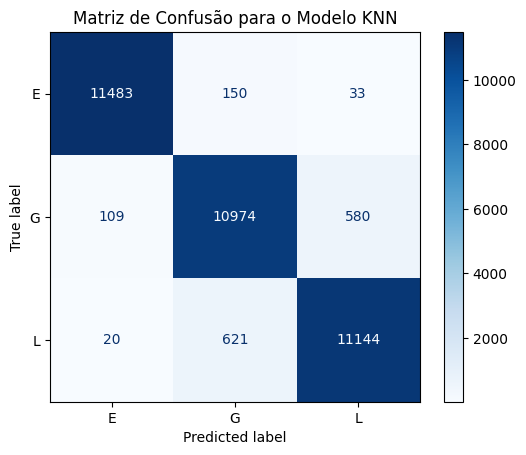

Modelo salvo em: /content/drive/MyDrive/Modelos/knn_model_balanceado.pkl
Conjunto de teste salvo como: /content/drive/MyDrive/Modelos/conjunto_teste_knn_balanceado.csv


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Montar o Google Drive
drive.mount('/content/drive')

# Carregar o conjunto de dados
file_path = '/content/drive/MyDrive/Dataset Ransonware/ed0e3c43-8495-45d6-9fe1-c91f36b9c82b_balanced.csv'
df = pd.read_csv(file_path, low_memory=False)

# Remover linhas com valores NaN
df.dropna(subset=[df.columns[0]], inplace=True)

# Separar características e rótulos
X = df.iloc[:, 2:]  # Características (todas as colunas, exceto a primeira)
y = df.iloc[:, 1]   # Rótulo (primeira coluna)

# Verificar tipos de dados e garantir que são numéricos
X = X.select_dtypes(include=[float, int])
print(f"Número de amostras em X: {X.shape[0]}")
print(f"Número de amostras em y: {y.shape[0]}")

# Codificar a coluna de rótulo para números
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Salvar o LabelEncoder para uso posterior no Google Drive
label_encoder_path = '/content/drive/MyDrive/Modelos/label_encoder_knn_balanceado.pkl'
joblib.dump(label_encoder, label_encoder_path)
print(f"Label encoder salvo em: {label_encoder_path}")

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Criar e treinar o modelo KNN usando um pipeline
model_pipeline = Pipeline(steps=[
    ('classifier', KNeighborsClassifier(n_neighbors=1))
])

model_pipeline.fit(X_train, y_train)

# Avaliar a precisão do modelo
y_pred = model_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Plotar a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusão para o Modelo KNN")
plt.show()

# Salvar o modelo treinado no Google Drive
model_path = '/content/drive/MyDrive/Modelos/knn_model_balanceado.pkl'
joblib.dump(model_pipeline, model_path)
print(f"Modelo salvo em: {model_path}")

# Salvar o conjunto de teste em CSV com índice sequencial e rótulo verdadeiro
X_test_with_labels = X_test.copy()
X_test_with_labels['index'] = range(len(X_test_with_labels))  # Criar índice sequencial começando de 0
X_test_with_labels['true_label'] = label_encoder.inverse_transform(y_test)  # Adicionar os rótulos verdadeiros

# Salvar em CSV no Google Drive
csv_test_path = '/content/drive/MyDrive/Modelos/conjunto_teste_knn_balanceado.csv'
X_test_with_labels.to_csv(csv_test_path, index=False)
print(f"Conjunto de teste salvo como: {csv_test_path}")


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import joblib
import matplotlib.pyplot as plt
from google.colab import drive

# Montar o Google Drive
drive.mount('/content/drive')

# Carregar o conjunto de dados
file_path = '/content/drive/MyDrive/Dataset Ransonware/ed0e3c43-8495-45d6-9fe1-c91f36b9c82b_desbalanceado.csv'
df = pd.read_csv(file_path, low_memory=False)

# Remover linhas com valores NaN
df.dropna(subset=[df.columns[0]], inplace=True)

# Separar características e rótulos
X = df.iloc[:, 2:]  # Características (todas as colunas, exceto a primeira)
y = df.iloc[:, 1]   # Rótulo (primeira coluna)

# Verificar tipos de dados e garantir que são numéricos
X = X.select_dtypes(include=[float, int])
print(f"Número de amostras em X: {X.shape[0]}")
print(f"Número de amostras em y: {y.shape[0]}")

# Codificar a coluna de rótulo para números
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Salvar o LabelEncoder para uso posterior no Google Drive
label_encoder_path = '/content/drive/MyDrive/Modelos/label_encoder_knn.pkl'
joblib.dump(label_encoder, label_encoder_path)
print(f"Label encoder salvo em: {label_encoder_path}")

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Criar e treinar o modelo KNN usando um pipeline
model_pipeline = Pipeline(steps=[
    ('classifier', KNeighborsClassifier(n_neighbors=1))
])

model_pipeline.fit(X_train, y_train)

# Avaliar a precisão do modelo
y_pred = model_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Plotar a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusão para o Modelo KNN")
plt.show()

# Salvar o modelo treinado no Google Drive
model_path = '/content/drive/MyDrive/Modelos/knn_model_desbalanceado.pkl'
joblib.dump(model_pipeline, model_path)
print(f"Modelo salvo em: {model_path}")

# Salvar o conjunto de teste em CSV com índice sequencial e rótulo verdadeiro
X_test_with_labels = X_test.copy()
X_test_with_labels['index'] = range(len(X_test_with_labels))  # Criar índice sequencial começando de 0
X_test_with_labels['true_label'] = label_encoder.inverse_transform(y_test)  # Adicionar os rótulos verdadeiros

# Salvar em CSV no Google Drive
csv_test_path = '/content/drive/MyDrive/Modelos/conjunto_teste_knn.csv'
X_test_with_labels.to_csv(csv_test_path, index=False)
print(f"Conjunto de teste salvo como: {csv_test_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Número de amostras em X: 1420618
Número de amostras em y: 1420618
Label encoder salvo em: /content/drive/MyDrive/Modelos/label_encoder_knn.pkl


KeyboardInterrupt: 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Número de amostras em X: 1420618
Número de amostras em y: 1420618
Label encoder salvo em: /content/drive/MyDrive/Modelos/label_encoder_xgboost.pkl


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:32:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 98.26%


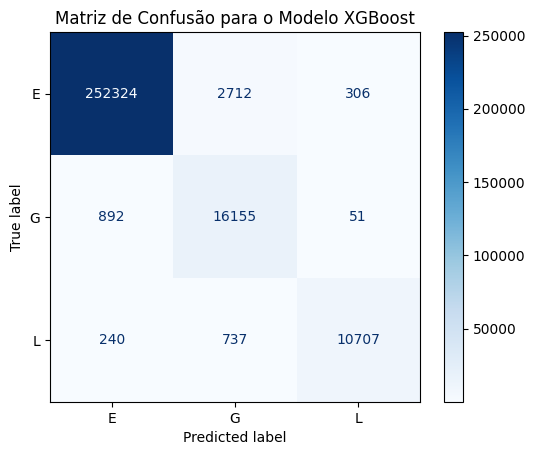

Modelo salvo em: /content/drive/MyDrive/Modelos/xgboost_model_desbalanceado.pkl
Conjunto de teste salvo como: /content/drive/MyDrive/Modelos/conjunto_teste_xgboost.csv


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import joblib
import matplotlib.pyplot as plt
from google.colab import drive

# Montar o Google Drive
drive.mount('/content/drive')

# Carregar o conjunto de dados
file_path = '/content/drive/MyDrive/Dataset Ransonware/ed0e3c43-8495-45d6-9fe1-c91f36b9c82b_desbalanceado.csv'
df = pd.read_csv(file_path, low_memory=False)

# Remover linhas com valores NaN
df.dropna(subset=[df.columns[0]], inplace=True)

# Separar características e rótulos
X = df.iloc[:, 2:]  # Características (todas as colunas, exceto a primeira)
y = df.iloc[:, 1]   # Rótulo (primeira coluna)

# Verificar tipos de dados e garantir que são numéricos
X = X.select_dtypes(include=[float, int])
print(f"Número de amostras em X: {X.shape[0]}")
print(f"Número de amostras em y: {y.shape[0]}")

# Codificar a coluna de rótulo para números
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Salvar o LabelEncoder para uso posterior no Google Drive
label_encoder_path = '/content/drive/MyDrive/Modelos/label_encoder_xgboost.pkl'
joblib.dump(label_encoder, label_encoder_path)
print(f"Label encoder salvo em: {label_encoder_path}")

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Criar e treinar o modelo XGBoost usando um pipeline
model_pipeline = Pipeline(steps=[
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
])

model_pipeline.fit(X_train, y_train)

# Avaliar a precisão do modelo
y_pred = model_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Plotar a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusão para o Modelo XGBoost")
plt.show()

# Salvar o modelo treinado no Google Drive
model_path = '/content/drive/MyDrive/Modelos/xgboost_model_desbalanceado.pkl'
joblib.dump(model_pipeline, model_path)
print(f"Modelo salvo em: {model_path}")

# Salvar o conjunto de teste em CSV com índice sequencial e rótulo verdadeiro
X_test_with_labels = X_test.copy()
X_test_with_labels['index'] = range(len(X_test_with_labels))  # Criar índice sequencial começando de 0
X_test_with_labels['true_label'] = label_encoder.inverse_transform(y_test)  # Adicionar os rótulos verdadeiros

# Salvar em CSV no Google Drive
csv_test_path = '/content/drive/MyDrive/Modelos/conjunto_teste_xgboost.csv'
X_test_with_labels.to_csv(csv_test_path, index=False)
print(f"Conjunto de teste salvo como: {csv_test_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Número de amostras em X: 175566
Número de amostras em y: 175566
Label encoder salvo em: /content/drive/MyDrive/Modelos/label_encoder_xgboost_balanced.pkl


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:34:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 96.65%


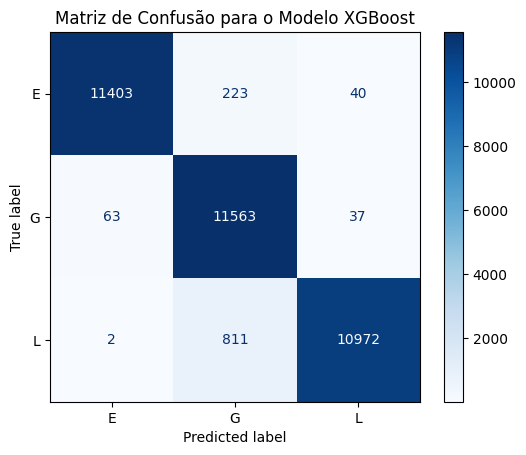

Modelo salvo em: /content/drive/MyDrive/Modelos/xgboost_model_balanced.pkl
Conjunto de teste salvo como: /content/drive/MyDrive/Modelos/conjunto_teste_xgboost_balanced.csv


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import joblib
import matplotlib.pyplot as plt
from google.colab import drive

# Montar o Google Drive
drive.mount('/content/drive')

# Carregar o conjunto de dados
file_path = '/content/drive/MyDrive/Dataset Ransonware/ed0e3c43-8495-45d6-9fe1-c91f36b9c82b_balanced.csv'
df = pd.read_csv(file_path, low_memory=False)

# Remover linhas com valores NaN
df.dropna(subset=[df.columns[0]], inplace=True)

# Separar características e rótulos
X = df.iloc[:, 2:]  # Características (todas as colunas, exceto a primeira)
y = df.iloc[:, 1]   # Rótulo (primeira coluna)

# Verificar tipos de dados e garantir que são numéricos
X = X.select_dtypes(include=[float, int])
print(f"Número de amostras em X: {X.shape[0]}")
print(f"Número de amostras em y: {y.shape[0]}")

# Codificar a coluna de rótulo para números
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Salvar o LabelEncoder para uso posterior no Google Drive
label_encoder_path = '/content/drive/MyDrive/Modelos/label_encoder_xgboost_balanced.pkl'
joblib.dump(label_encoder, label_encoder_path)
print(f"Label encoder salvo em: {label_encoder_path}")

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Criar e treinar o modelo XGBoost usando um pipeline
model_pipeline = Pipeline(steps=[
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
])

model_pipeline.fit(X_train, y_train)

# Avaliar a precisão do modelo
y_pred = model_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Plotar a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusão para o Modelo XGBoost")
plt.show()

# Salvar o modelo treinado no Google Drive
model_path = '/content/drive/MyDrive/Modelos/xgboost_model_balanced.pkl'
joblib.dump(model_pipeline, model_path)
print(f"Modelo salvo em: {model_path}")

# Salvar o conjunto de teste em CSV com índice sequencial e rótulo verdadeiro
X_test_with_labels = X_test.copy()
X_test_with_labels['index'] = range(len(X_test_with_labels))  # Criar índice sequencial começando de 0
X_test_with_labels['true_label'] = label_encoder.inverse_transform(y_test)  # Adicionar os rótulos verdadeiros

# Salvar em CSV no Google Drive
csv_test_path = '/content/drive/MyDrive/Modelos/conjunto_teste_xgboost_balanced.csv'
X_test_with_labels.to_csv(csv_test_path, index=False)
print(f"Conjunto de teste salvo como: {csv_test_path}")
